In [ ]:
!git clone https://github.com/openai/guided-diffusion.git guided
%cd guided
!pip install -v -e .
%cd ..

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm.notebook import tqdm
from funcs import DDIM, NoisyClassifier, show_images, generate_image_with_guid

In [3]:
from guided.guided_diffusion.unet import UNetModel

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
network = UNetModel(
    image_size=32,
    in_channels=1,
    model_channels=32,
    out_channels=1,
    num_res_blocks=2,
    attention_resolutions=(2, 2),
    channel_mult=(1, 2, 4, 8),
    num_classes=10
)

In [ ]:
# noisy_classifier = NoisyClassifier()
# noisy_classifier.load_state_dict(torch.load("noisy_classifier.pth"))
# noisy_classifier = noisy_classifier.to(device)
# noisy_classifier.eval()

  0%|          | 0/99 [00:00<?, ?it/s]

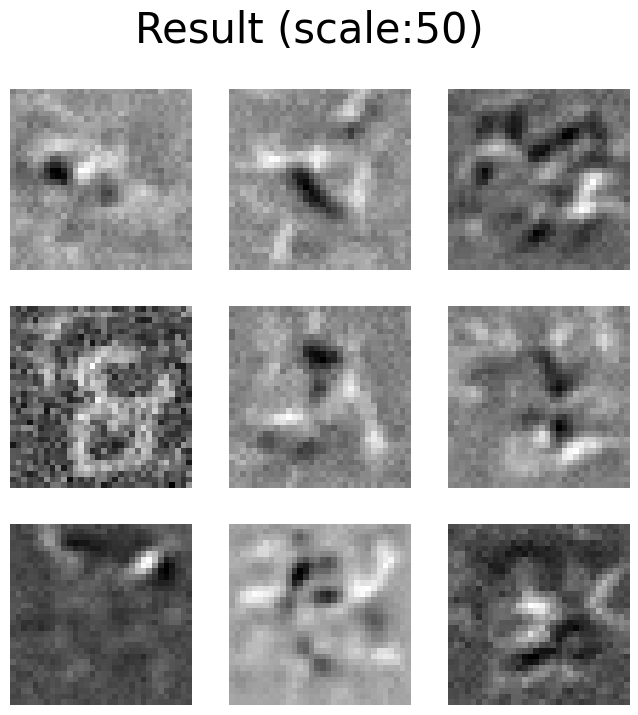

In [9]:
num_timesteps=100
gradient_scale = 50

network = network.to(device)
model = DDIM(network, num_timesteps, gradient_scale, beta_start=0.0001, beta_end=0.02, device=device)

model.load_state_dict(torch.load("diffusion_model.pth")['model_state_dict'])
model = model.to(device)
model.eval()

generated = generate_image_with_guid(model, 10, 1, 32)

show_images(generated, f"Result (scale:{gradient_scale})", f"Result (scale:{gradient_scale})_ddim")